# 1. Classification- KNN

## load data

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
sensor = pd.read_csv('https://raw.githubusercontent.com/shadgriffin/machine_failure/master/equipment_failure_data_1.csv')
sensor.head()


#,"DoleLR"	,"PID",	"outpressure",	"inpressure",	"temp"]]

ys_failure=sensor['EQUIPMENT_FAILURE']==1
ys_no_failure=sensor['EQUIPMENT_FAILURE']==0
sensor_failure=sensor[ys_failure].truncate(after=5000)
sensor_no_failure=sensor[ys_no_failure].truncate(after=50)

#sensor_no_failure.head(30)

sensor_failure_all= sensor_failure.append(sensor_no_failure)
sensor_failure_all.head(20)
sensor_failure_all

Xs=sensor_failure_all[["S15",	"S16"	]]	
ys=sensor_failure_all['EQUIPMENT_FAILURE']
sensor_failure_all.head(30)
#sensor_failure_all.shape

,ID,DATE,REGION_CLUSTER,MAINTENANCE_VENDOR,MANUFACTURER,WELL_GROUP,S15,S17,S13,S5,S16,S19,S18,EQUIPMENT_FAILURE,S8,AGE_OF_EQUIPMENT
143,100001,4/24/15,G,O,Y,1,0.000000,0.000000,0.000000,0.000000,8.892400,0.9,170.400000,1,0.000000,1023
1452,100003,11/22/16,C,L,T,1,0.000000,0.000000,0.000000,0.000000,8.704800,0.0,4.400000,1,0.000000,1121
1974,100009,4/27/16,H,M,X,3,0.000000,0.000000,23.614483,7202.413793,3.282400,42.7,57.100000,1,89.084138,832
2882,100014,10/21/16,H,M,S,2,0.000000,0.000000,24.680690,5257.103448,3.731000,25.5,43.100000,1,45.019310,1449
2940,100017,12/18/14,E,K,T,2,0.000000,0.000000,29.906154,5233.307692,8.413200,0.1,678.000000,1,1.092308,9996
4227,100018,6/26/16,A,J,T,3,0.000000,0.000000,24.430000,3494.000000,6.059000,0.9,249.100000,1,271.170000,1252
4851,100019,3/11/16,B,M,Q,4,0.000000,0.000000,28.340000,2522.000000,10.472000,0.0,11.400000,1,43.050000,1205
0,100001,12/2/14,G,O,Y,1,11.088000,145.223448,39.340000,3501.000000,8.426869,1.9,24.610345,0,0.000000,880
1,100001,12/3/14,G,O,Y,1,8.877943,187.573214,39.200000,3489.000000,6.483714,1.9,24.671429,0,0.000000,881
2,100001,12/4/14,G,O,Y,1,8.676444,148.363704,38.870000,3459.000000,6.159659,2.0,24.733333,0,0.000000,882


In [28]:
sensor_failure_all.shape
sensor_failure_all.dtypes

ID                      int64
DATE                   object
REGION_CLUSTER         object
MAINTENANCE_VENDOR     object
MANUFACTURER           object
WELL_GROUP              int64
S15                   float64
S17                   float64
S13                   float64
S5                    float64
S16                   float64
S19                   float64
S18                   float64
EQUIPMENT_FAILURE       int64
S8                    float64
AGE_OF_EQUIPMENT        int64
dtype: object

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


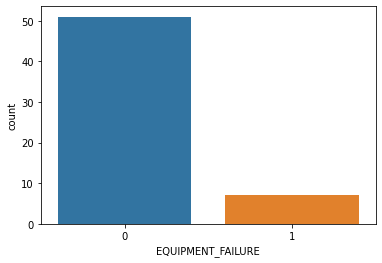

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
#plt.figure(figsize=(10,10))
#sensor_preS5=sensor_pre.truncate( after=400)

sns.countplot(sensor_failure_all['EQUIPMENT_FAILURE'],label="Count")
plt.show()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(Xs, ys, random_state=0)
X_train.shape

(43, 2)

In [6]:
import matplotlib.cm as cm
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
import matplotlib.patches as mpatches
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split



#Xiot=df_iotdata[["footfall",	"atemp"	,"selfLR"	,"ClinLR"	,"DoleLR"	,"PID",	"outpressure",	"inpressure",	"temp"]]
#X=Xs  #.truncate(after=10)

#X = fruits[['mass', 'width', 'height', 'color_score']]
#y = fruits['fruit_label']
#y=ys  #.truncate(after=10)

#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

def plot_scatter_knn(X, y, n_neighbors, weights):

    # as matrix set data its imßpoort for datframes
    X_mat = X.as_matrix()
    y_mat = y.as_matrix()

    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF','#AFAFAF'])
    cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#AFAFAF'])

    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_mat, y_mat)

    # Plot the decision boundary by assigning a color in the color map
    # to each mesh point.
    
    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50
    
    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    patch0 = mpatches.Patch(color='#FF0000', label='normal')
    patch1 = mpatches.Patch(color='#00FF00', label='failure')
   
    plt.legend(handles=[patch0, patch1])

        
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title("4-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))
    
    plt.show()

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/ipykernel_launcher.py:26: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/anaconda/envs/azureml_py36/lib/python3.6/site-packages/ipykernel_launcher.py:27: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


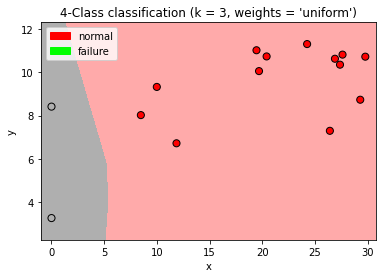

In [12]:
#call above function with kkn =5
#plot the knn with scatter plot
plot_scatter_knn(X_test, y_test, 3, 'uniform')

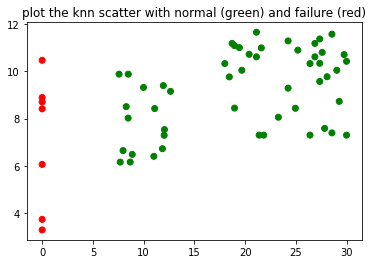

In [13]:
#plot the knn scatter with normal (green) and failure (red)

colors = {1:'red', 0:'green'}



plt.title("plot the knn scatter with normal (green) and failure (red)")
plt.scatter(Xs.iloc[:, 0],Xs.iloc[:, 1], c=ys.map(colors))


# 2. Classification- Random forest
http://luisvalesilva.com/datasimple/random_forests.html

## load data

In [19]:
import pandas as pd
sensor = pd.read_csv('https://raw.githubusercontent.com/shadgriffin/machine_failure/master/equipment_failure_data_1.csv')
sensor.head()


#,"DoleLR"	,"PID",	"outpressure",	"inpressure",	"temp"]]

ys_failure=sensor['EQUIPMENT_FAILURE']==1
ys_no_failure=sensor['EQUIPMENT_FAILURE']==0
sensor_failure=sensor[ys_failure].truncate(after=5000)
sensor_no_failure=sensor[ys_no_failure].truncate(after=50)

#sensor_no_failure.head(30)

sensor_failure_all= sensor_failure.append(sensor_no_failure)
sensor_failure_all.head(20)
sensor_failure_all

Xs=sensor_failure_all[["S18",	"S16"	]]	
ys=sensor_failure_all['EQUIPMENT_FAILURE']
sensor_failure_all.head(30)

,ID,DATE,REGION_CLUSTER,MAINTENANCE_VENDOR,MANUFACTURER,WELL_GROUP,S15,S17,S13,S5,S16,S19,S18,EQUIPMENT_FAILURE,S8,AGE_OF_EQUIPMENT
143,100001,4/24/15,G,O,Y,1,0.000000,0.000000,0.000000,0.000000,8.892400,0.9,170.400000,1,0.000000,1023
1452,100003,11/22/16,C,L,T,1,0.000000,0.000000,0.000000,0.000000,8.704800,0.0,4.400000,1,0.000000,1121
1974,100009,4/27/16,H,M,X,3,0.000000,0.000000,23.614483,7202.413793,3.282400,42.7,57.100000,1,89.084138,832
2882,100014,10/21/16,H,M,S,2,0.000000,0.000000,24.680690,5257.103448,3.731000,25.5,43.100000,1,45.019310,1449
2940,100017,12/18/14,E,K,T,2,0.000000,0.000000,29.906154,5233.307692,8.413200,0.1,678.000000,1,1.092308,9996
4227,100018,6/26/16,A,J,T,3,0.000000,0.000000,24.430000,3494.000000,6.059000,0.9,249.100000,1,271.170000,1252
4851,100019,3/11/16,B,M,Q,4,0.000000,0.000000,28.340000,2522.000000,10.472000,0.0,11.400000,1,43.050000,1205
0,100001,12/2/14,G,O,Y,1,11.088000,145.223448,39.340000,3501.000000,8.426869,1.9,24.610345,0,0.000000,880
1,100001,12/3/14,G,O,Y,1,8.877943,187.573214,39.200000,3489.000000,6.483714,1.9,24.671429,0,0.000000,881
2,100001,12/4/14,G,O,Y,1,8.676444,148.363704,38.870000,3459.000000,6.159659,2.0,24.733333,0,0.000000,882


In [35]:
sensor_failure_all.describe()

,ID,WELL_GROUP,S15,S17,S13,S5,S16,S19,S18,EQUIPMENT_FAILURE,S8,AGE_OF_EQUIPMENT
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000
mean,100002.275862,1.155172,17.544926,44.424152,36.972245,3498.340153,8.950112,3.765517,121.267447,0.120690,7.748548,1086.775862
std,4.212734,0.555727,9.715874,73.831695,8.039048,892.552307,1.935337,6.064031,98.466078,0.328611,37.898310,1194.381012
min,100001.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.282400,0.000000,4.400000,0.000000,0.000000,832.000000
25%,100001.000000,1.000000,9.155542,0.000000,38.842500,3460.000000,7.429670,3.000000,25.178768,0.000000,0.000000,893.250000
50%,100001.000000,1.000000,19.560000,0.000000,39.380000,3509.107143,9.305354,3.000000,154.600000,0.000000,0.000000,907.500000
75%,100001.000000,1.000000,26.760000,131.968421,39.715000,3541.500000,10.581200,3.300000,155.250000,0.000000,0.000000,921.750000
max,100019.000000,4.000000,30.000000,203.375000,40.820000,7202.413793,11.660400,42.700000,678.000000,1.000000,271.170000,9996.000000


In [39]:
#check for null values in df
sensor_failure_all.isnull().sum().sum()
sensor_failure_all.isnull().sum()


ID                    0
DATE                  0
REGION_CLUSTER        0
MAINTENANCE_VENDOR    0
MANUFACTURER          0
WELL_GROUP            0
S15                   0
S17                   0
S13                   0
S5                    0
S16                   0
S19                   0
S18                   0
EQUIPMENT_FAILURE     0
S8                    0
AGE_OF_EQUIPMENT      0
dtype: int64

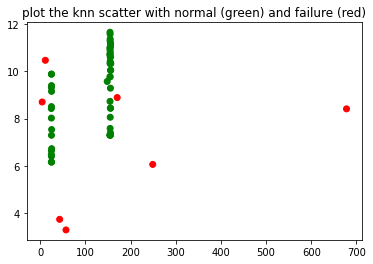

In [20]:
#plot the knn scatter with normal (green) and failure (red)

X_train, X_test, y_train, y_test = train_test_split(Xs, ys, random_state=0)
X_train.shape


colors = {1:'red', 0:'green'}



plt.title("plot the knn scatter with normal (green) and failure (red)")
plt.scatter(Xs.iloc[:, 0],Xs.iloc[:, 1], c=ys.map(colors))

## plot the feature specs ans compute decision boundaries

In [17]:
from matplotlib.colors import ListedColormap
#from matplotlib.colors import BoundaryNorm

def compute_decision_boundaries(clf, x, y, axes):
    x1s = np.linspace(axes[0], axes[1], 300)
    x2s = np.linspace(axes[2], axes[3], 300)
    x1, x2 = np.meshgrid(x1s, x2s)
    x_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(x_new).reshape(x1.shape)
    
    return x1, x2, y_pred

def plot_feature_space(clf, x, y,axes):
    x1, x2, y_pred = compute_decision_boundaries(clf, x, y, axes)
    custom_cmap = ListedColormap(['y','b','r'])
    plt.contourf(x1, x2, y_pred, cmap=custom_cmap, alpha=0.1, linewidth=1)
    plt.plot(x[:, 0][y==0], x[:, 1][y==0], "go", marker='o')
    plt.plot(x[:, 0][y==1], x[:, 1][y==1], "ro", marker='o')
   # plt.plot(x[:, 0][y==2], x[:, 1][y==2], "rd", marker='.')
    #plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
   # if file_name is not none:
   #     plt.savefig(file_name, dpi=300, bbox_inches='tight')
    plt.figure(figsize=(8, 4))

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: The following kwargs were not used by contour: 'linewidth'
  app.launch_new_instance()


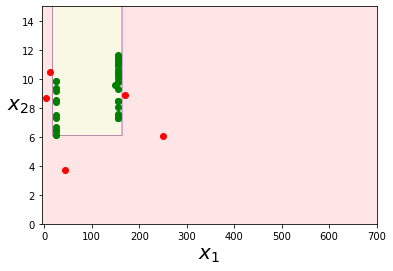

<Figure size 576x288 with 0 Axes>

In [22]:
from sklearn.tree import DecisionTreeClassifier
# Instantiate the classifier class for a deeper tree 
tree_clf = DecisionTreeClassifier( random_state=42)

# Grow a Decision Tree
tree_clf.fit(X_train.values, y_train.values)

plot_feature_space(tree_clf,X_train.values, y_train.values , axes=[-5, 700, 0, 15])

## bagging classifier

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: The following kwargs were not used by contour: 'linewidth'
  app.launch_new_instance()


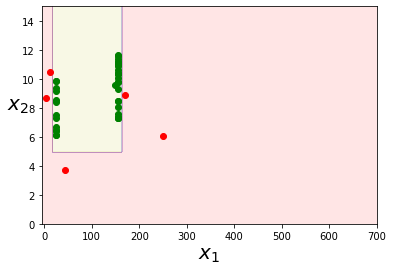

<Figure size 576x288 with 0 Axes>

In [33]:
from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=150,
                            bootstrap=True, n_jobs=-1,
                            oob_score=True, random_state=42)

bag_clf.fit(X_train.values, y_train.values)

plot_feature_space(bag_clf, X_train.values, y_train.values, axes=[-5, 700, 0, 15])

In [41]:
print('Out-of-bag evaluation score: {}%'.format(round(bag_clf.oob_score_, 4) * 100))

Out-of-bag evaluation score: 95.35%


## random forest classifier

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: The following kwargs were not used by contour: 'linewidth'
  app.launch_new_instance()


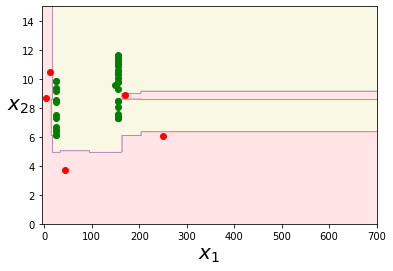

<Figure size 576x288 with 0 Axes>

In [31]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=250, max_leaf_nodes=10, n_jobs=-1,
                                bootstrap=True, oob_score=True, random_state=42)



rf_clf.fit(X_train.values, y_train.values)

plot_feature_space(rf_clf, X_train.values, y_train.values, axes=[-5, 700, 0, 15])


In [44]:
#The model will not have seen the out-of-bag instances at all during training and so they can actually be used as a test set, in a procedure known as Out-of-bag Evaluation.
print('Out-of-bag evaluation score: {}%'.format(round(rf_clf.oob_score_, 4) * 100))

Out-of-bag evaluation score: 88.37%
